<a href="https://colab.research.google.com/github/nitaliraj/ML_F_PES2UG23CS395_NITALI/blob/main/PES2UG23CS395_Case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#REQUIRES MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Sci-kit learn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#To set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
#LOADING BREAST CANCER DATASET FROM THE CSV
data_file = "customer_churn_data.csv"
df = pd.read_csv(data_file)

#TO DISPLAY FIRST FEW RECORDS
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes
3,CUST_000004,67,Male,1,No,No,3,Yes,No,DSL,...,No,No,One year,No,Credit card (automatic),54.14,172.76,4,5,No
4,CUST_000005,41,Female,0,Yes,No,7,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,71.77,466.98,3,3,No


In [ ]:
#DISPLAYS BASIC INFO ABOUT DATASET
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-n

In [ ]:

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

print("Data Types Distribution:")
for dtype, count in df.dtypes.value_counts().items():
    print(f"  {dtype}: {count} columns")

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

print("\nUnique Values per Column:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} unique values")

Dataset Shape: 10000 rows × 24 columns
Memory Usage: 10.76 MB

Data Types Distribution:
  object: 17 columns
  int64: 5 columns
  float64: 2 columns

Duplicate Rows: 0

Unique Values per Column:
  customer_id: 10000 unique values
  age: 63 unique values
  gender: 2 unique values
  senior_citizen: 2 unique values
  partner: 2 unique values
  dependents: 2 unique values
  tenure: 72 unique values
  phone_service: 2 unique values
  multiple_lines: 3 unique values
  internet_service: 3 unique values
  online_security: 3 unique values
  online_backup: 3 unique values
  device_protection: 3 unique values
  tech_support: 3 unique values
  streaming_tv: 3 unique values
  streaming_movies: 3 unique values
  contract: 3 unique values
  paperless_billing: 2 unique values
  payment_method: 4 unique values
  monthly_charges: 5111 unique values
  total_charges: 9765 unique values
  customer_satisfaction: 5 unique values
  support_calls: 10 unique values
  churn: 2 unique values


Target Distribution:
  No: 7728 samples (77.3%)
  Yes: 2272 samples (22.7%)


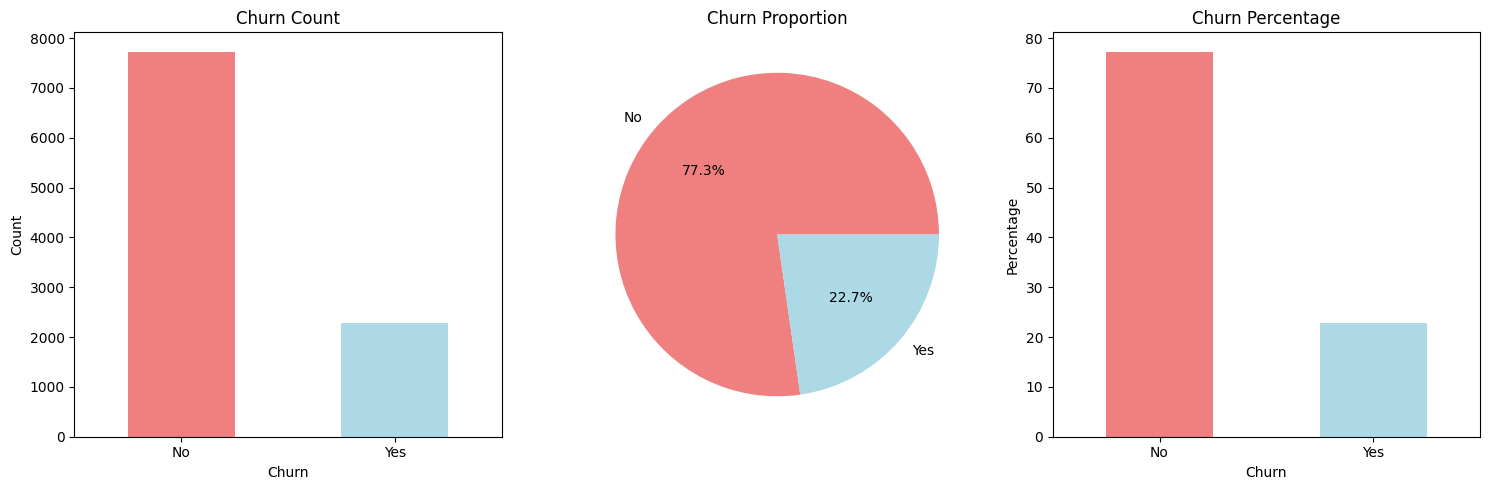

In [ ]:
#To analyze target value distribution
target_counts = df['churn'].value_counts()
target_props = df['churn'].value_counts(normalize=True)

print("Target Distribution:")
for value, count in target_counts.items():
    print(f"  {value}: {count} samples ({target_props[value]*100:.1f}%)")

#Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Count plot
target_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Churn Count')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

#Display Pie chart
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=['lightcoral', 'lightblue'])
axes[1].set_title('Churn Proportion')

#Display Percentage plot
(target_props * 100).plot(kind='bar', ax=axes[2], color=['lightcoral', 'lightblue'])
axes[2].set_title('Churn Percentage')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Percentage')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Total Numerical Features: 7

Descriptive Statistics for First 8 Numerical Features:
             age  senior_citizen     tenure  monthly_charges  total_charges  \
count  10000.000       10000.000  10000.000        10000.000      10000.000   
mean      44.662           0.092     22.217           53.640       1192.146   
std       14.398           0.289     19.963           17.048       1193.960   
min       18.000           0.000      1.000           20.050         20.320   
25%       34.000           0.000      6.000           40.408        306.305   
50%       44.000           0.000     16.000           51.770        796.955   
75%       55.000           0.000     33.000           66.280       1681.078   
max       80.000           1.000     72.000          111.810       7078.800   

       customer_satisfaction  support_calls  
count              10000.000      10000.000  
mean                   3.399          2.007  
std                    1.069          1.415  
min                 

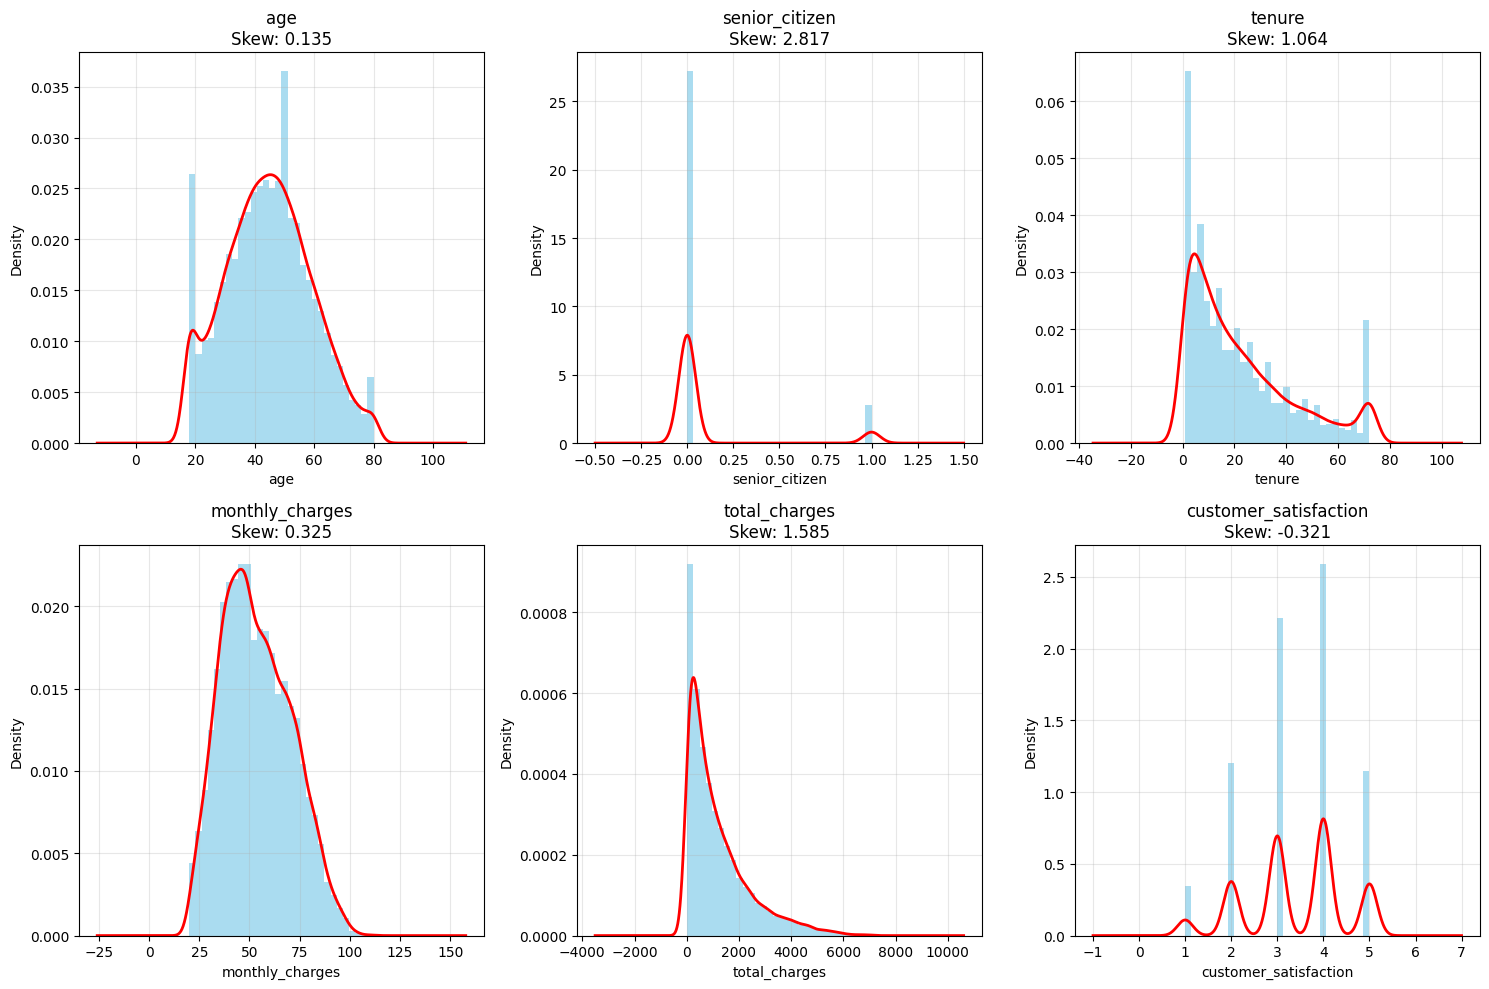

In [ ]:
#Analyze numerical features(excluding  target and non-feature IDs)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

#Remove target(churn_flag) if present
if 'churn_flag' in numerical_cols:
    numerical_cols.remove('churn_flag')

#Remove any obvious IDs if present
for id_col in ['id', 'customer_id']:
    if id_col in numerical_cols:
        numerical_cols.remove(id_col)

print(f"Total Numerical Features: {len(numerical_cols)}")
key_features = numerical_cols[:8]
#First eight numeric features for summary/plots

print("\nDescriptive Statistics for First 8 Numerical Features:")
print(df[key_features].describe().round(3))

#Create distribution plots for first six numeric features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(key_features[:6]):
    df[col].hist(bins=30, ax=axes[i], density=True, alpha=0.7, color='skyblue')
    try:
        df[col].plot.kde(ax=axes[i], color='red', linewidth=2)
    except Exception as e:
        print(f"Skipping KDE for {col}: {e}")
    axes[i].set_title(f'{col}\nSkew: {df[col].skew():.3f}')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


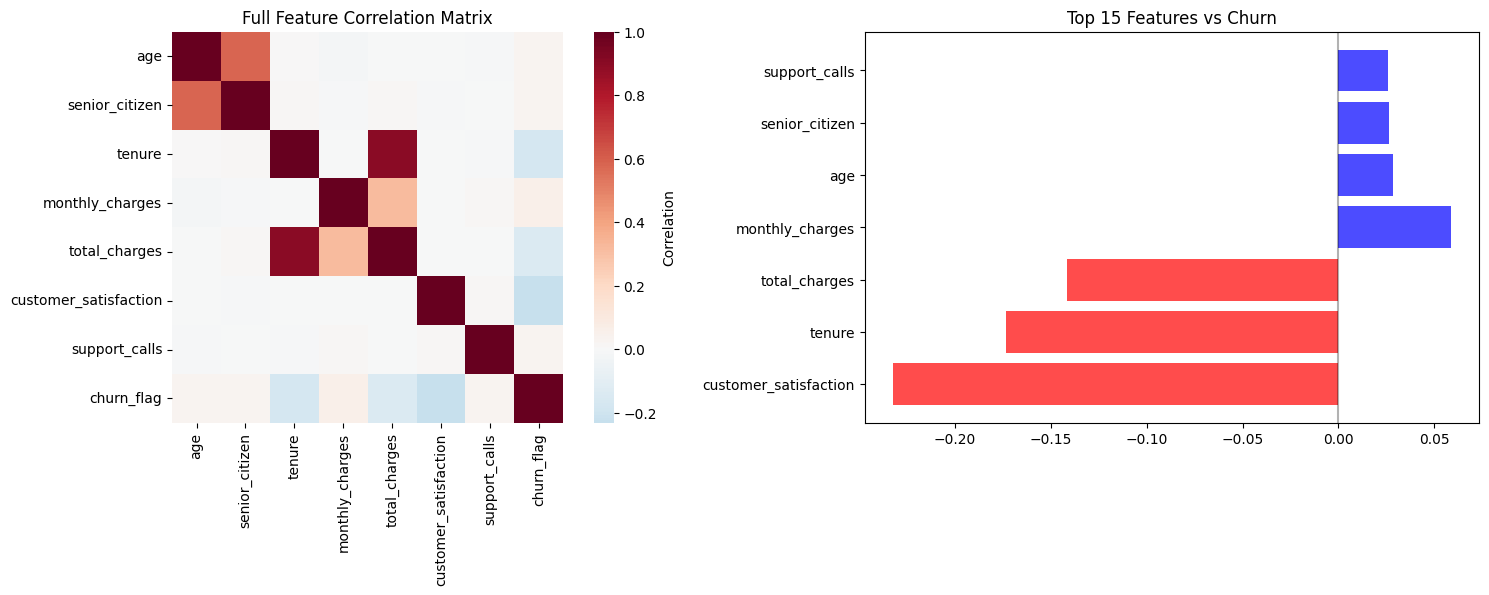


Top 5 Features Correlated with Churn:
customer_satisfaction   -0.233
tenure                  -0.174
total_charges           -0.141
monthly_charges          0.059
age                      0.029
Name: churn_flag, dtype: float64


In [ ]:
#Prepare data for Correlation Analysis
df_corr = df.drop(['customer_id'], axis=1, errors='ignore').copy()

#Map churn to numeric if not already mapped
if 'churn_flag' not in df_corr.columns:
    df_corr['churn_flag'] = df_corr['churn'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}).astype(int)

#Compute Correlation Matrix
corr_matrix = df_corr.select_dtypes(include=[np.number]).corr()

#Create Correlation Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Full Correlation Heatmap
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0, square=True,
            ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Full Feature Correlation Matrix')

#Target Correlation with churn_flag
target_corr = corr_matrix['churn_flag'].drop('churn_flag').sort_values(key=abs, ascending=False)

#Color bars: Red for Negative Correlation, Blue for Positive
colors = ['red' if x < 0 else 'blue' for x in target_corr.values]

#Horizontal Bar plot for top 15 correlations
axes[1].barh(range(len(target_corr[:15])), target_corr[:15].values, color=colors, alpha=0.7)
axes[1].set_yticks(range(len(target_corr[:15])))
axes[1].set_yticklabels(target_corr[:15].index)
axes[1].set_title('Top 15 Features vs Churn')
axes[1].axvline(0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

#Print top five correlations
print("\nTop 5 Features Correlated with Churn:")
print(target_corr[:5].round(3))


In [ ]:
#Check for Missing Values
print("=== Missing Values Analysis ===")
missing_values = df.isnull().sum()

#Show only columns that have Missing Values
missing_nonzero = missing_values[missing_values > 0]

if missing_nonzero.empty:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values in dataset: {missing_values.sum()}")
    print("\nMissing values per column:")
    print(missing_nonzero.sort_values(ascending=False))


=== Missing Values Analysis ===
✅ No missing values found in the dataset!


In [ ]:
#Display summary
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                age  senior_citizen        tenure  monthly_charges  \
count  10000.000000    10000.000000  10000.000000     10000.000000   
mean      44.662500        0.092300     22.216800        53.640204   
std       14.397976        0.289463     19.963232        17.047669   
min       18.000000        0.000000      1.000000        20.050000   
25%       34.000000        0.000000      6.000000        40.407500   
50%       44.000000        0.000000     16.000000        51.770000   
75%       55.000000        0.000000     33.000000        66.280000   
max       80.000000        1.000000     72.000000       111.810000   

       total_charges  customer_satisfaction  support_calls  
count   10000.000000           10000.000000   10000.000000  
mean     1192.146321               3.399300       2.007400  
std      1193.960345               1.069193       1.415184  
min        20.320000               1.000000       0.000000  
25%       306.305000               3.000000 

In [ ]:
#Drop Unnecessary Columns for Churn Dataset
columns_to_drop = ['customer_id']  #ID column not useful for modeling
df_clean = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

#Prepare features (X) and target (y)
X = df_clean.drop('churn', axis=1)   #drop the original churn string column
y = df_clean['churn']                #target variable

#Convert target to binary: Yes -> 1, No -> 0
y = y.replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}).astype(int)

print("Target variable distribution after encoding:")
print(y.value_counts())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Target variable distribution after encoding:
churn
0    7728
1    2272
Name: count, dtype: int64

Features shape: (10000, 22)
Target shape: (10000,)


In [ ]:
#Split the data into Training, Validation, and Test sets (70%, 10%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42, stratify=y_temp)

print("Data split sizes:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Data split sizes:
Training set: 7000 samples
Validation set: 1020 samples
Test set: 1980 samples


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

#Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#Preprocessing: impute + scale numeric, impute + one-hot encode categorical
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Build pipeline with preprocessing + logistic regression
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

#Train
log_reg.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully on churn dataset!")


✅ Logistic Regression model trained successfully on churn dataset!


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#Preprocessing: impute missing values for both numeric & categorical
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Decision Tree Pipeline
tree_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Train
tree_clf.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully on churn dataset!")


✅ Decision Tree model trained successfully on churn dataset!


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

#Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#SVM pipeline
svm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

#Train
svm_clf.fit(X_train, y_train)

print("✅ SVM model trained successfully on churn dataset!")


✅ SVM model trained successfully on churn dataset!


In [ ]:
#Calculate performance metrics for all models
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree_clf,
    'SVM': svm_clf
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_val)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred)
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.round(4))

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.7775     0.5287  0.1983    0.2884
1        Decision Tree    0.6873     0.3395  0.3966    0.3658
2                  SVM    0.7725     0.0000  0.0000    0.0000


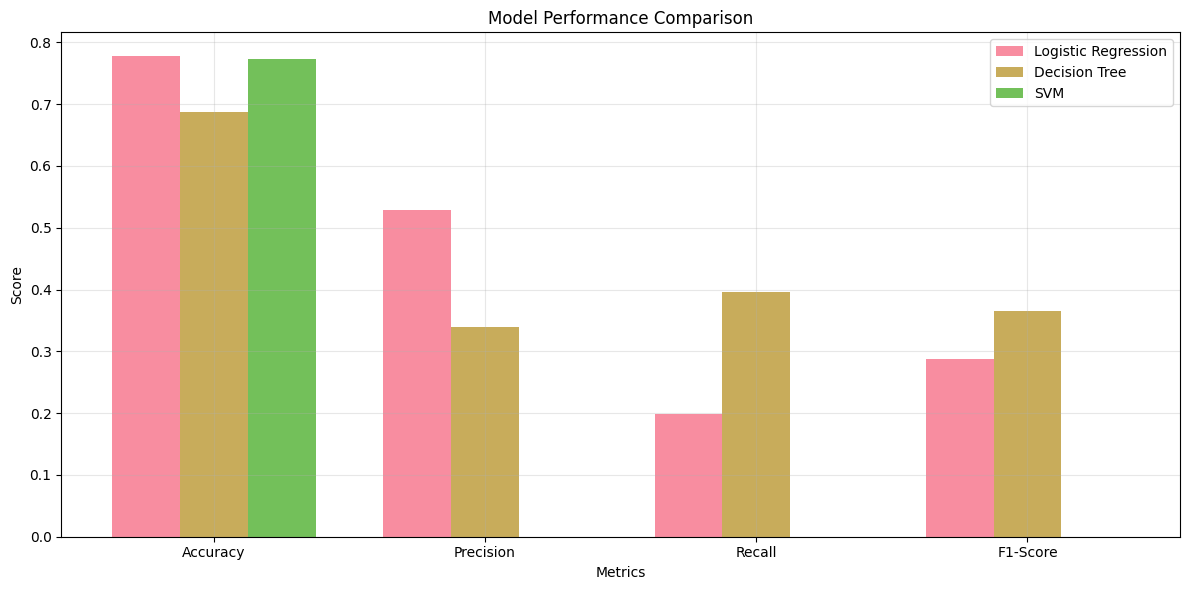

In [ ]:
#Visualize Model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

for i, (_, row) in enumerate(results_df.iterrows()):
    ax.bar(x + i*width, [row[metric] for metric in metrics],
           width, label=row['Model'], alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()